<a href="https://colab.research.google.com/github/econ105/AI/blob/main/Accuracy_for_each_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)


X_train.shape:  (50000, 32, 32, 3)
Y_train.shape:  (50000, 1)
X_test.shape:  (10000, 32, 32, 3)
Y_test.shape:  (10000, 1)


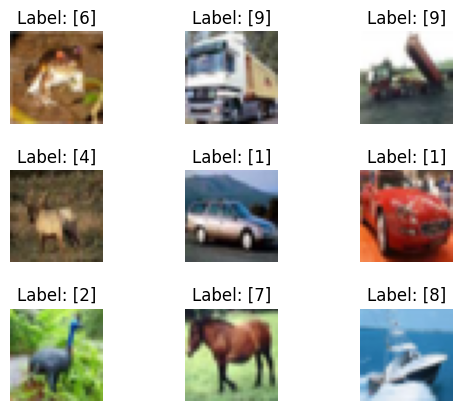

In [9]:
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="binary")
    ax.set_title("Label: " + str(Y_train[i]))
    ax.axis("off")
plt.subplots_adjust(hspace = .5)
plt.show()

In [10]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

seed = 10
np.random.seed(seed)

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [11]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding="same",input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 64)         

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Epoch 1/10
313/313 - 88s - loss: 1.6458 - accuracy: 0.4015 - val_loss: 1.3145 - val_accuracy: 0.5456 - 88s/epoch - 283ms/step
Epoch 2/10
313/313 - 82s - loss: 1.2794 - accuracy: 0.5434 - val_loss: 1.1585 - val_accuracy: 0.6012 - 82s/epoch - 262ms/step
Epoch 3/10
313/313 - 81s - loss: 1.1389 - accuracy: 0.5968 - val_loss: 1.0213 - val_accuracy: 0.6505 - 81s/epoch - 258ms/step
Epoch 4/10
313/313 - 80s - loss: 1.0455 - accuracy: 0.6277 - val_loss: 0.9597 - val_accuracy: 0.6738 - 80s/epoch - 256ms/step
Epoch 5/10
313/313 - 81s - loss: 0.9750 - accuracy: 0.6571 - val_loss: 0.9044 - val_accuracy: 0.6886 - 81s/epoch - 260ms/step
Epoch 6/10
313/313 - 85s - loss: 0.9216 - accuracy: 0.6746 - val_loss: 0.9078 - val_accuracy: 0.6878 - 85s/epoch - 273ms/step
Epoch 7/10
313/313 - 80s - loss: 0.8728 - accuracy: 0.6901 - val_loss: 0.8442 - val_accuracy: 0.7105 - 80s/epoch - 256ms/step
Epoch 8/10
313/313 - 80s - loss: 0.8319 - accuracy: 0.7056 - val_loss: 0.8460 - val_accuracy: 0.7080 - 80s/epoch - 257

In [13]:
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("Accuracy Training dataset  = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy Testing dataset   = {:.2f}".format(accuracy))


Testing ...
1563/1563 [==============================] - 38s 24ms/step - loss: 0.5919 - accuracy: 0.8067
Accuracy Training dataset  = 0.81
313/313 [==============================] - 6s 18ms/step - loss: 0.8133 - accuracy: 0.7155
Accuracy Testing dataset   = 0.72


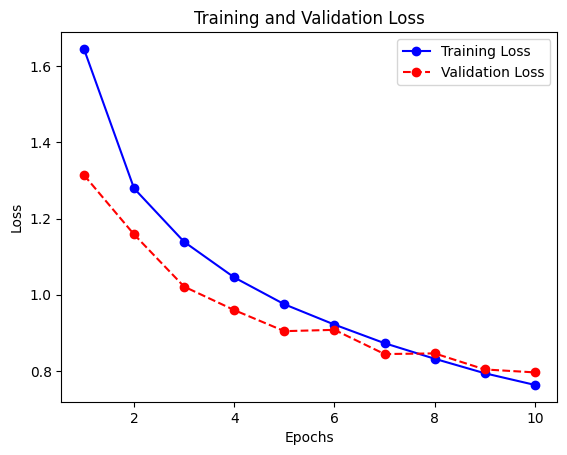

In [14]:

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

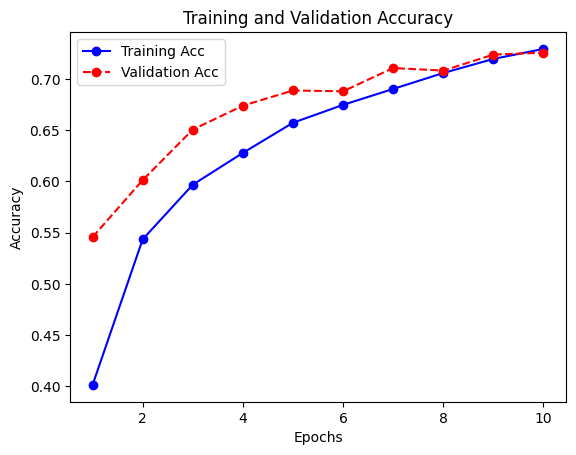

In [15]:

acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
print("Saving Model: cifar10.h5 ...")
model.save("cifar10.h5")

Saving Model: cifar10.h5 ...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Predicting ...
1/1 [==============================] - 0s 118ms/step


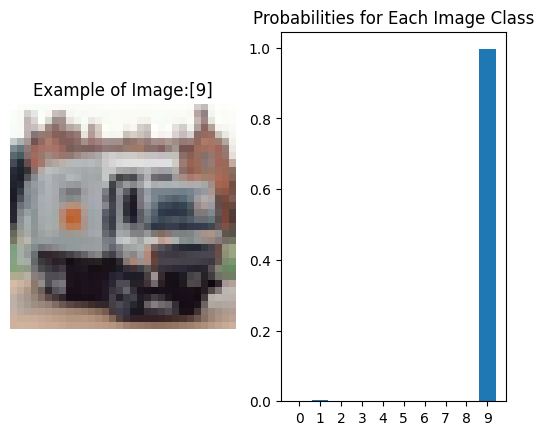

In [17]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

i = 11
img = X_test[i]
X_test_img = img.reshape(1, 32, 32, 3).astype("float32")

plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Image:" + str(Y_test[i]))
plt.imshow(img)
plt.axis("off")
print("Predicting ...")
probs = model.predict(X_test_img, batch_size=1)
plt.subplot(1,2,2)
plt.title("Probabilities for Each Image Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()